# Observations
The latitude has the greatest effect on temperature in the Northern Hemisphere.
As we get farther from the equator (lat = 0) maximum temperature decreases.
Cities closest to the equator seem to have lower humidity than cities farther from the equator.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# set up dataframe
weather_data = pd.DataFrame()
weather_data["lat"] = ''
weather_data['lng'] = ''
weather_data['max temp'] = ''
weather_data['humidity'] = ''
weather_data['cloudiness'] = ''
weather_data['wind speed'] = ''
weather_data['country'] = ''
weather_data['date'] = ''
# loop through cities
for index, city in enumerate(cities):
    # set up query url and access
    query_url = f"{base_url}&appid={weather_api_key}&q={city}"
    response = requests.get(query_url).json()
    print(f"Processing city number {index}  |  {city}")
    # sleep for a second so weather api doesnt get mad at me
    time.sleep(1)
    # try to import data into our dataframe
    try:
        weather_data.loc[index, "lng"] = response['coord']['lon']
        weather_data.loc[index, "lat"] = response['coord']['lat']
        weather_data.loc[index, "max temp"] = response['main']['temp_max']
        weather_data.loc[index, "humidity"] = response['main']['humidity']
        weather_data.loc[index, "cloudiness"] = response['clouds']['all']
        weather_data.loc[index, "wind speed"] = response['wind']['speed']
        weather_data.loc[index, "country"] = response['sys']['country']
        weather_data.loc[index, "date"] = response['dt']
    # if data not found print message
    except:
        print(f"{city} not found... skipping")

Processing city number 0  |  sergeyevka
Processing city number 1  |  babanusah
babanusah not found... skipping
Processing city number 2  |  kawana waters
kawana waters not found... skipping
Processing city number 3  |  puerto ayora
Processing city number 4  |  rikitea
Processing city number 5  |  dukat
Processing city number 6  |  maldonado
Processing city number 7  |  punta arenas
Processing city number 8  |  cape town
Processing city number 9  |  saint-philippe
Processing city number 10  |  karkaralinsk
karkaralinsk not found... skipping
Processing city number 11  |  albany
Processing city number 12  |  jamestown
Processing city number 13  |  san patricio
Processing city number 14  |  middle island
Processing city number 15  |  alyangula
Processing city number 16  |  slave lake
Processing city number 17  |  tateyama
Processing city number 18  |  recanati
Processing city number 19  |  hovd
Processing city number 20  |  mar del plata
Processing city number 21  |  georgetown
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# export to csv
weather_data.to_csv("../output_data/weather_data.csv", index=False)
weather_data

,lat,lng,max temp,humidity,cloudiness,wind speed,country,date
0,53.88,67.4158,256.4,88,34,2.69,KZ,1644185630
3,-0.7393,-90.3518,303.13,88,43,2.68,EC,1644185634
4,-23.1203,-134.9692,299.4,70,3,7.77,PF,1644185399
5,62.55,155.55,247.81,66,0,0.54,RU,1644185636
6,-34.6667,-54.9167,293.28,69,77,9.08,UY,1644185638
...,...,...,...,...,...,...,...,...
629,-3.4167,114.85,297.2,94,100,1.03,ID,1644186454
630,-14.2426,31.3253,290.22,96,84,1.54,ZM,1644186456
631,-3.3667,135.4833,298.11,89,99,0.99,ID,1644186305
632,40.6167,120.7167,259.97,85,29,1.74,CN,1644186458


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[ weather_data["humidity"] > 100, : ]

,lat,lng,max temp,humidity,cloudiness,wind speed,country,date


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the weather_data DataFrame, which we call "city_df".
city_df = weather_data.loc[ weather_data["humidity"] <= 100, : ]
city_df.head()

,lat,lng,max temp,humidity,cloudiness,wind speed,country,date
0,53.88,67.4158,256.4,88,34,2.69,KZ,1644185630
3,-0.7393,-90.3518,303.13,88,43,2.68,EC,1644185634
4,-23.1203,-134.9692,299.4,70,3,7.77,PF,1644185399
5,62.55,155.55,247.81,66,0,0.54,RU,1644185636
6,-34.6667,-54.9167,293.28,69,77,9.08,UY,1644185638


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

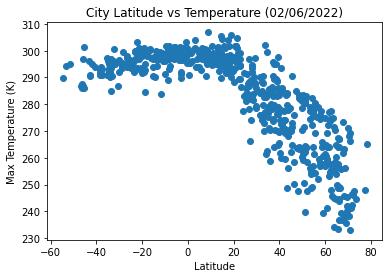

In [11]:
# convert columns into a series of ints
lat = city_df['lat'].astype(float)
temp = city_df["max temp"].astype(float)
# create scatter plot
plt.scatter(lat, temp)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title("City Latitude vs Temperature (02/06/2022)")
plt.savefig("../output_data/City Latitude vs Temperature.png")
plt.show()

This plot is looking at the relationship between city latitude and maximum temperature.

## Latitude vs. Humidity Plot

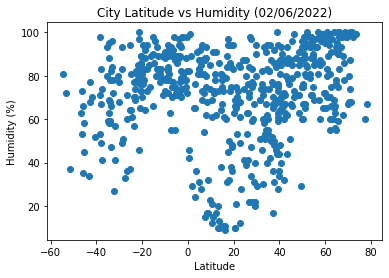

In [12]:
# convert columns into a series of ints
lat = city_df['lat'].astype(float)
humd = city_df["humidity"].astype(float)
# create scatter plot
plt.scatter(lat, humd)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (02/06/2022)")
plt.savefig("../output_data/City Latitude vs Humidity.png")
plt.show()

This plot is looking at the relationship between city latitude and percent humidity.

## Latitude vs. Cloudiness Plot

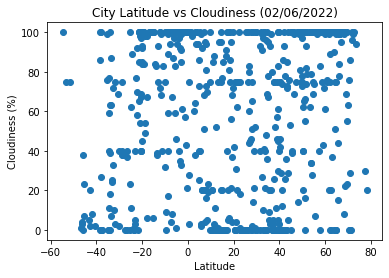

In [13]:
# convert columns into a series of ints
lat = city_df['lat'].astype(float)
cloud = city_df["cloudiness"].astype(float)
# create scatter plot
plt.scatter(lat, cloud)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (02/06/2022)")
plt.savefig("../output_data/City Latitude vs Cloudiness.png")
plt.show()

This plot is looking at the relationship between city latitude and percent cloudiness.

## Latitude vs. Wind Speed Plot

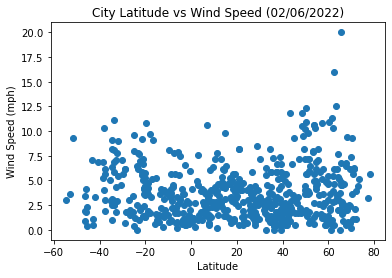

In [14]:
# convert columns into a series of ints
lat = city_df['lat'].astype(float)
wind = city_df["wind speed"].astype(float)
# create scatter plot
plt.scatter(lat, wind)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (02/06/2022)")
plt.savefig("../output_data/City Latitude vs Wind Speed.png")
plt.show()

This plot is looking at the relationship between city latitude and wind speed.

## Linear Regression

In [15]:
north = city_df.loc[ city_df["lat"] >= 0, : ]
south = city_df.loc[ city_df["lat"] < 0, : ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

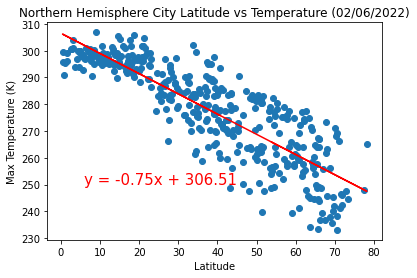

In [18]:
# convert columns into a series of ints
n_lat = north['lat'].astype(float)
n_temp = north["max temp"].astype(float)
# create scatter plot
plt.scatter(n_lat, n_temp)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title("Northern Hemisphere City Latitude vs Temperature (02/06/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
# this is equation for our line
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,250),fontsize=15,color="red")
plt.savefig("../output_data/Northern Hemisphere City Latitude vs Temperature.png")
plt.show()

This plot is looking at the relationship between northern hemisphere city latitude and maximum temperature.
There is a strong negative correlation between the two.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

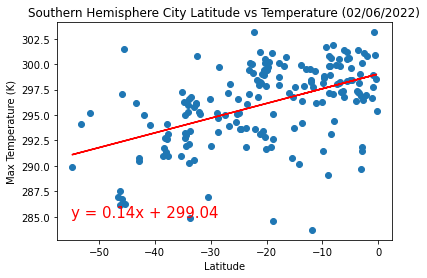

In [20]:
# convert columns into a series of ints
s_lat = south['lat'].astype(float)
s_temp = south["max temp"].astype(float)
# create scatter plot
plt.scatter(s_lat, s_temp)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title("Southern Hemisphere City Latitude vs Temperature (02/06/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
# this is equation for our line
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,285),fontsize=15,color="red")

plt.savefig("../output_data/Southern Hemisphere City Latitude vs Temperature.png")
plt.show()

This plot is looking at the relationship between southern hemisphere city latitude and maximum temperature.
There is a weak positive correlation between the two.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

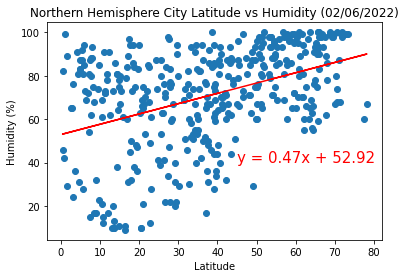

In [25]:
# convert columns into a series of ints
n_lat = north['lat'].astype(float)
n_hum = north["humidity"].astype(float)
# create scatter plot
plt.scatter(n_lat, n_hum)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere City Latitude vs Humidity (02/06/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)
# this is equation for our line
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")

plt.savefig("../output_data/Northern Hemisphere City Latitude vs Humidity.png")
plt.show()

This plot is looking at the relationship between northern hemisphere city latitude and percent humidity.
There is a positive correlation between the two.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

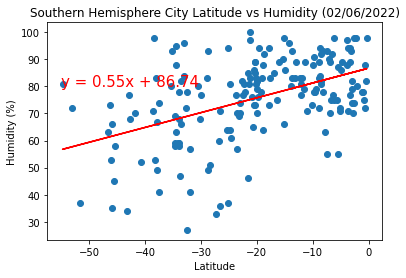

In [26]:
# convert columns into a series of ints
s_lat = south['lat'].astype(float)
s_humid = south["humidity"].astype(float)
# create scatter plot
plt.scatter(s_lat, s_humid)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere City Latitude vs Humidity (02/06/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_humid)
# this is equation for our line
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

plt.savefig("../output_data/Southern Hemisphere City Latitude vs Humidity.png")
plt.show()

This plot is looking at the relationship between southern hemisphere city latitude and percent humidity.
There is a positive correlation between the two.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

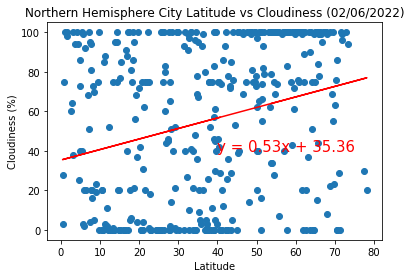

In [29]:
# convert columns into a series of ints
n_lat = north['lat'].astype(float)
n_cloud = north["cloudiness"].astype(float)
# create scatter plot
plt.scatter(n_lat, n_cloud)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere City Latitude vs Cloudiness (02/06/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
# this is equation for our line
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

plt.savefig("../output_data/Northern Hemisphere City Latitude vs Cloudiness.png")
plt.show()

This plot is looking at the relationship between northern hemisphere city latitude and percent cloudiness.
There is a positive correlation between the two.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

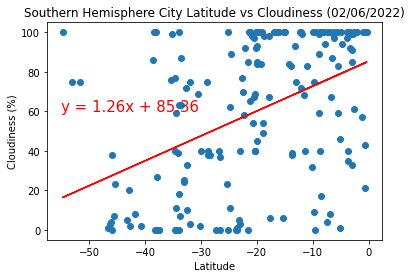

In [31]:
# convert columns into a series of ints
s_lat = south['lat'].astype(float)
s_cloud = south["cloudiness"].astype(float)
# create scatter plot
plt.scatter(s_lat, s_cloud)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere City Latitude vs Cloudiness (02/06/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
# this is equation for our line
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

plt.savefig("../output_data/Southern Hemisphere City Latitude vs Cloudiness.png")
plt.show()

This plot is looking at the relationship between southern hemisphere city latitude and percent cloudiness.
There is a positive correlation between the two.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

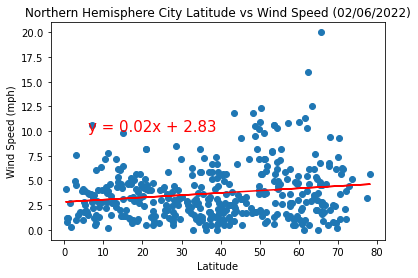

In [33]:
# convert columns into a series of ints
n_lat = north['lat'].astype(float)
n_wind = north["wind speed"].astype(float)
# create scatter plot
plt.scatter(n_lat, n_wind)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere City Latitude vs Wind Speed (02/06/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
# this is equation for our line
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/Northern Hemisphere City Latitude vs Wind Speed.png")
plt.show()

This plot is looking at the relationship between northern hemisphere city latitude and wind speed.
There is a very weak positive correlation between the two.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

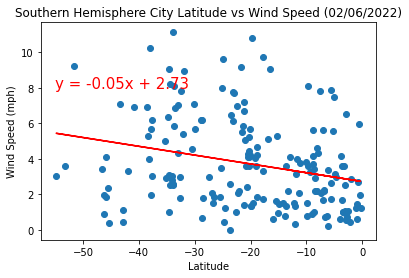

In [35]:
# convert columns into a series of ints
s_lat = south['lat'].astype(float)
s_wind = south["wind speed"].astype(float)
# create scatter plot
plt.scatter(s_lat, s_wind)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (02/06/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_wind)
# this is equation for our line
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,8),fontsize=15,color="red")

plt.savefig("../output_data/Southern Hemisphere City Latitude vs Wind Speed.png")
plt.show()

This plot is looking at the relationship between southern hemisphere city latitude and wind speed.
There is a negative correlation between the two.